In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
auto_prices = pd.read_csv('Auto_Data_Preped.csv')
auto_prices.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'log_price'],
      dtype='object')

In [3]:
auto_prices.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,log_price
0,3,alfa-romero,gas,std,two,hardtop_convert,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,9.510075
1,3,alfa-romero,gas,std,two,hardtop_convert,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,9.711116
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.711116
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.543235
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,9.767095


### Prepare the model matrix 
__All scikit-learn models require a numpy array of numeric only values for the features. The resulting array is often referred to as the model matrix.__

#### Create the dummy variables from categorical features
Create dummy variables for the categorical features. Dummy variables encode categorical features as a set of binary variables. There is one dummy variable for each possible category. For each case all of the values in the dummy variables are set to zero, except the one corresponding to the category value, which is set to one. In this way, a categorical variable with any number of categories can be encoded as series of numeric features which scikit-learn can operate on. This process is referred to as __one hot encoding__

The sklearn.preprocessing package contains functions to encode categorical features as dummy variables in two steps

In [4]:
print(auto_prices['body_style'].unique())
Features = auto_prices['body_style']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['hardtop_convert' 'hatchback' 'sedan' 'wagon']
[0 0 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 2 2 2 3 1 1 1 1 1 1 2 3 1
 1 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1 2 1 2 2 1 2 2 2 3 0 2 2 0 2 0 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 3 2 1 2 3 0 1 2 2 3 2 1 1 1 2 2 3 3 2 2 3 3 2 2 2
 1 1 1 2 2 3 1 1 0 0 0 1 2 1 2 1 2 1 1 1 2 2 2 2 2 3 3 3 3 1 1 1 3 3 3 2 1
 2 1 2 1 2 2 1 2 1 0 0 1 0 1 0 2 2 1 2 1 1 1 2 3 2 2 2 2 2 2 2 0 1 2 2 3 2
 3 2 3 2 3 2 2 2 2 2]


Numerically coded categorical variable is converted to a set of dummy variables following these steps:

 1. A one hot encoder object is created using the OneHotEncoder method from the sklearn.preprocessing module.
 2. The numerically coded categorical feature is fit with the one hot encoder.
 3. The dummy variables are encoded using the transform method on the encodings.


In [5]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [9]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['fuel_type', 'aspiration', 'drive_wheels', 'num_of_cylinders']

for col in categorical_columns:
    temp = encode_string(auto_prices[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])

(195, 17)
[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 2.548e+03 1.110e+02 2.100e+01
  0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 2.548e+03 1.110e+02 2.100e+01
  0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 1.000e+00]]


In [10]:
# ADD THE NUMERIC FEATURES
Features = np.concatenate([Features, np.array(auto_prices[['curb_weight', 'horsepower', 'city_mpg']])], axis = 1)
Features[:2,:]

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.548e+03, 1.110e+02,
        2.100e+01, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.548e+03,
        1.110e+02, 2.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.548e+03, 1.110e+02,
        2.100e+01, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.548e+03,
        1.110e+02, 2.100e+01]])

In [11]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
labels = np.array(auto_prices['log_price'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [12]:
# SCALE THE NUMERICAL FEATURE
scaler = preprocessing.StandardScaler().fit(x_train[:,14:])
x_train[:,14:] = scaler.transform(x_train[:,14:])
x_test[:,14:] = scaler.transform(x_test[:,14:])
print(x_train.shape)
x_train[:5,:]

(155, 20)


array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  2.27500000e+03,  5.60000000e+01,
         3.40000000e+01,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00, -1.40487872e-01,
        -4.69544930e-01,  5.00000000e-01, -5.38406896e-01,
        -1.26225437e+00,  1.33602998e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  3.04900000e+03,  1.60000000e+02,
         1.90000000e+01,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00, -1.40487872e-01,
        -4.69544930e-01,  5.00000000e-01,  9.68373811e-01,
         1.51064566e+00, -1.00126852e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.10900000e+03,  7.00000000e+01,
         3.00000000e+01,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.0

In [13]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [14]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 0.1665738  -0.04278241  0.07682861 -0.02923896  0.00200785  0.01635107
  0.092191    0.18348972 -0.01210868  0.08754761  0.08383343  0.02679487
  0.03026612  0.11432005  0.0103034   0.03338483 -0.03565857 -0.85128889
 -0.47177953 -0.66462019]


### Model Evaluation
At first glance, these metrics look promising. The RMSE, MAE and median absolute error are all small and in a similar range. However, notice that the $R^2$ and $R^2_{adj}$ are rather different. This model has a large number of parameters compared to the number of cases available. This result indicates that the model may be overfit and might not generalize well.

In [15]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.02261620774438568
Root Mean Square Error = 0.150386860278369
Mean Absolute Error    = 0.11912678436798312
Median Absolute Error  = 0.10696449432971633
R^2                    = 0.9216386321026503
Adjusted R^2           = 0.7453255543336135


### Visualize Residual Plots

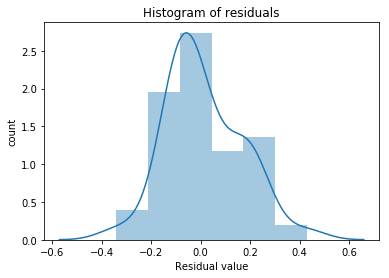

In [16]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)

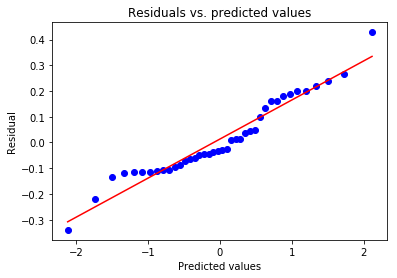

In [17]:
#QUantile-Quantile Residual Plot
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

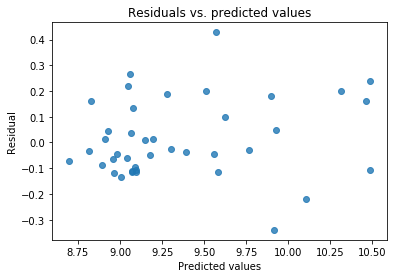

In [19]:
#Verifying residuals with the predicted labels
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score)